# Importing Modules

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from imblearn.over_sampling import RandomOverSampler
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
from sklearn.decomposition import PCA

# Importing Dataset

In [12]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# No Missing Values

In [14]:
df.isna().any().any()

False

# Encoding Categorical Values

In [15]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [16]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,y)
X2 = pd.DataFrame(X_,columns=X.columns)

# Undersampling

In [18]:
X=X1
y=Y1

# Spliting into Train and Test Sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

PCA

20 PCs explain  [70.74068688 99.76281581] % of variance cumulatively


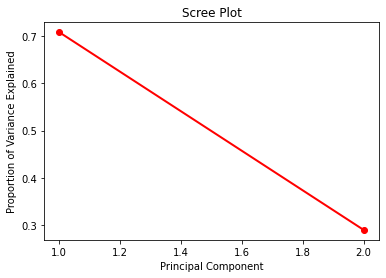

In [20]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [17.44555167 24.44074193 30.65901903 36.38446522 41.40488981 46.19338821
 50.24580214 54.14136646 57.92204534 61.55864087 65.17124382 68.54778693
 71.79236823 74.88825386 77.83767848 80.70137862 83.37833712 85.93647278
 88.25925916 90.54980649] % of variance cumulatively


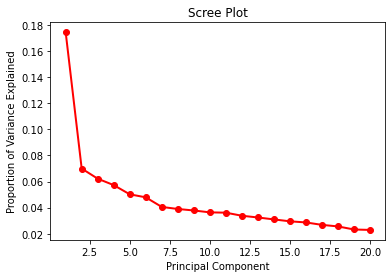

In [21]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [11.52097344 20.44330143 28.67985327 36.31753724 42.61134166 48.23334781
 53.36701768 58.09955124 62.64094633 66.81234597 70.37901588 73.84498837
 77.15158301 79.93520506 82.65007667 85.17122704 87.59414783] % of variance cumulatively


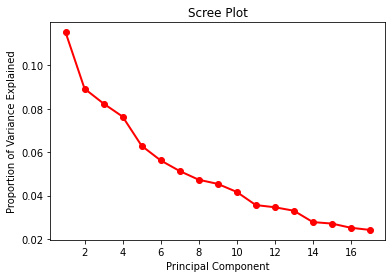

In [22]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [23]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyper-parameter Tuning Using Grid Search CV

In [24]:
def tune_hyperparameters(model,X,y):
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)

### With Standardization

In [25]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_standardized,y_train)

Best Params:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.51058345        nan 0.50452284 0.70673903
 0.70673903 0.68281321 0.70673903 0.70673903        nan        nan
 0.51058345        nan 0.51058345 0.72202623 0.72202623 0.70696517
 0.72202623 0.72202623        nan        nan 0.73116237        nan
 0.73111714 0.7009498  0.7009498  0.7009498  0.7009498  0.7009498
        nan        nan 0.70710086        nan 0.70710086 0.71311624
 0.71311624 0.71311624 0.71311624 0.71311624        nan        nan
 0.71311624        nan 0.71311624 0.71311624 0.71311624 0.71311624
 0.71311624 0.71311624        nan        nan 0.71311624        nan
 0.71311624 0.71311624 0.71311624 0.71311624 0.71311624 0.71311624
        nan        nan 0.71311624        nan 0.71311624 0.71311624
 0.71311624 0.71311624 0.71311624 0.71311624]
  category=UserWarning,


### With Normalization

In [26]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_normalized,y_train)

Best Params:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.51058345        nan 0.50452284 0.51664405
 0.51664405 0.72804161 0.51664405 0.51664405        nan        nan
 0.51058345        nan 0.50759837 0.71298055 0.71298055 0.72804161
 0.71298055 0.71298055        nan        nan 0.66445047        nan
 0.66137494 0.73713252 0.73713252 0.73713252 0.73713252 0.73713252
        nan        nan 0.71601085        nan 0.71601085 0.71908639
 0.71908639 0.71908639 0.71908639 0.71908639        nan        nan
 0.70416101        nan 0.70416101 0.70416101 0.70416101 0.70416101
 0.70416101 0.70416101        nan        nan 0.70719132        nan
 0.70420624 0.70420624 0.70420624 0.70420624 0.70420624 0.70420624
        nan        nan 0.70723654        nan 0.70723654 0.70723654
 0.70723654 0.70723654 0.70723654 0.70723654]
  category=UserWarning,


# Performing Logistic Regression

In [27]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without scaling

Accuracy:  0.5944055944055944
Precision:  0.5876288659793815
Recall:  0.76
F1 Score:  0.6627906976744187
Confusion Matrix:
 [[28 40]
 [18 57]]


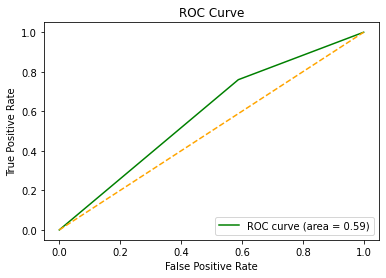

In [28]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.6993006993006993
Precision:  0.7105263157894737
Recall:  0.72
F1 Score:  0.7152317880794702
Confusion Matrix:
 [[46 22]
 [21 54]]


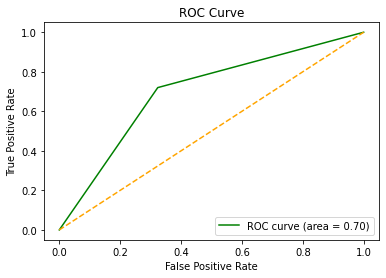

In [29]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=0.1,penalty='l2',solver='newton-cg'),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.7062937062937062
Precision:  0.7142857142857143
Recall:  0.7333333333333333
F1 Score:  0.7236842105263158
Confusion Matrix:
 [[46 22]
 [20 55]]


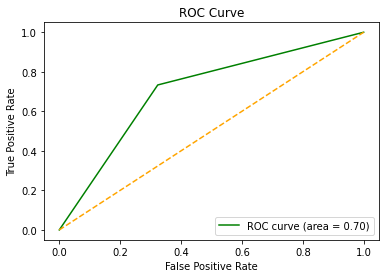

In [30]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=1.0,penalty='l2',solver='saga'),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [31]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [32]:
metrics = []

### Without Scaling

In [33]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000),X,y))

Accuracy:  0.5632474804031354
Precision:  0.5473931623931623
Recall:  0.7299645390070922
F1 Score:  0.62551419911233


### With Standardization

In [34]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=0.1,penalty='l2',solver='newton-cg'),X_standardized,y))

Accuracy:  0.6855095184770437
Precision:  0.6904516523665459
Recall:  0.675354609929078
F1 Score:  0.6819829370394856


### With Normalization

In [35]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=1.0,penalty='l2',solver='saga'),X_normalized,y))

Accuracy:  0.6981634938409854
Precision:  0.7029201924672308
Recall:  0.6966312056737589
F1 Score:  0.6971087303364408


# Performance and Comparison Plots

In [36]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.563247,0.547393,0.729965,0.625514
With Standardization,0.685510,0.690452,0.675355,0.681983
With Normalization,0.698163,0.702920,0.696631,0.697109


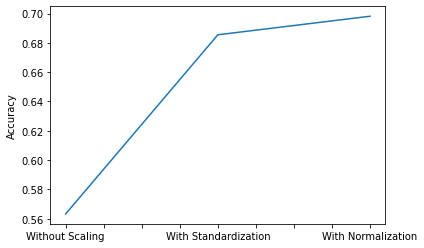

In [37]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

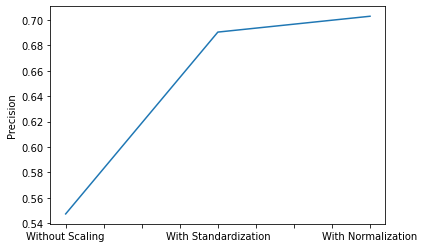

In [38]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

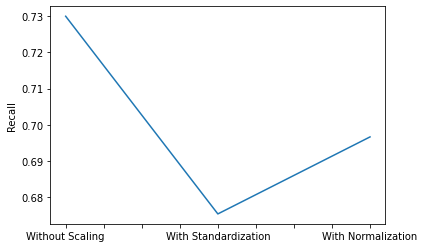

In [39]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

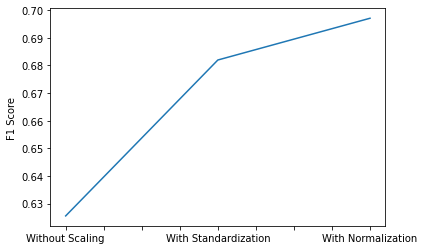

In [40]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()

# Oversampling

In [41]:
X=X2
y=Y2

# Spliting into Train and Test Sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

PCA

20 PCs explain  [72.0048171  99.77248109] % of variance cumulatively


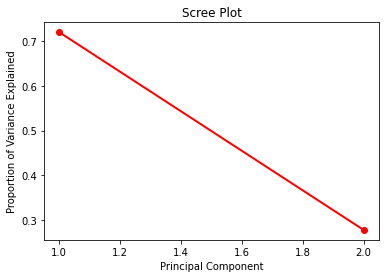

In [43]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [16.64465197 23.58747178 29.84784841 35.39372339 40.35079016 44.67005664
 48.56277173 52.35230055 56.02047014 59.61604873 63.08993843 66.47912883
 69.75557924 72.92265112 75.95912735 78.92913152 81.82658034 84.6202276
 87.25717622 89.81093824] % of variance cumulatively


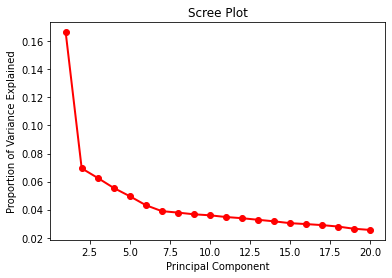

In [44]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [ 9.99039652 19.50265107 27.87547577 34.91437668 41.54863366 47.16013872
 52.37699663 57.42392261 61.95387303 65.91516331 69.62470578 73.16976549
 76.20145628 79.04762956 81.82726103 84.41792803 86.85682217] % of variance cumulatively


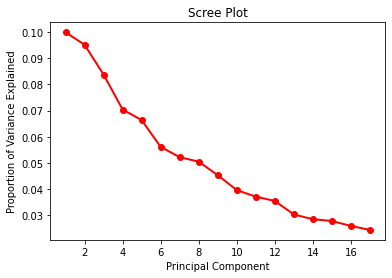

In [45]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [46]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyper-parameter Tuning Using Grid Search CV

In [47]:
def tune_hyperparameters(model,X,y):
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)

### With Standardization

In [48]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_standardized,y_train)

Best Params:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.51390467        nan 0.51390467 0.73289604
 0.73289604 0.72710899 0.73405546 0.73289604        nan        nan
 0.67554494        nan 0.68423389 0.75318087 0.75318087 0.75201977
 0.75318087 0.75318087        nan        nan 0.75085867        nan
 0.74912457 0.75376225 0.75376225 0.75434196 0.75376225 0.75376225
        nan        nan 0.75318757        nan 0.75260786 0.75260618
 0.75260618 0.75260618 0.75260618 0.75260618        nan        nan
 0.75202647        nan 0.75260618 0.75318589 0.75318589 0.75318589
 0.75318589 0.75318589        nan        nan 0.75318589        nan
 0.75318589 0.75318589 0.75318589 0.75318589 0.75318589 0.75318589
        nan        nan 0.75318589        nan 0.75318589 0.75318589
 0.75318589 0.75318589 0.75318589 0.75318589]
  category=UserWarning,


### With Normalization

In [49]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_normalized,y_train)

Best Params:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.51390467        nan 0.49709307 0.68887325
 0.68887325 0.73464857 0.69003267 0.68887325        nan        nan
 0.67092234        nan 0.68019268 0.73522661 0.73522661 0.73464522
 0.73522661 0.73522661        nan        nan 0.73232973        nan
 0.7363877  0.74333585 0.74333585 0.74333585 0.74333585 0.74333585
        nan        nan 0.74564966        nan 0.74564966 0.74390718
 0.74390718 0.74390718 0.74390718 0.74390718        nan        nan
 0.74275111        nan 0.74275111 0.74275111 0.74275111 0.74275111
 0.74275111 0.74275111        nan        nan 0.74275111        nan
 0.74275111 0.74275111 0.74275111 0.74275111 0.74275111 0.74275111
        nan        nan 0.74275111        nan 0.74275111 0.74275111
 0.74275111 0.74275111 0.74275111 0.74275111]
  category=UserWarning,


# Performing Logistic Regression

In [50]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without scaling

Accuracy:  0.6013513513513513
Precision:  0.596116504854369
Recall:  0.7791878172588832
F1 Score:  0.6754675467546755
Confusion Matrix:
 [[138 208]
 [ 87 307]]


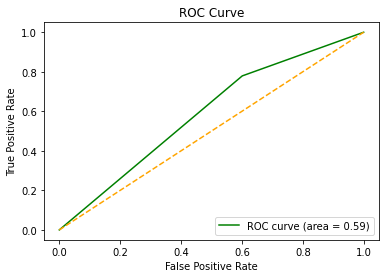

In [51]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.745945945945946
Precision:  0.7682291666666666
Recall:  0.748730964467005
F1 Score:  0.7583547557840616
Confusion Matrix:
 [[257  89]
 [ 99 295]]


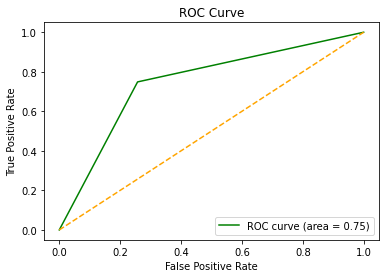

In [52]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=0.1,penalty='l2',solver='newton-cg'),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.7594594594594595
Precision:  0.7783505154639175
Recall:  0.766497461928934
F1 Score:  0.772378516624041
Confusion Matrix:
 [[260  86]
 [ 92 302]]


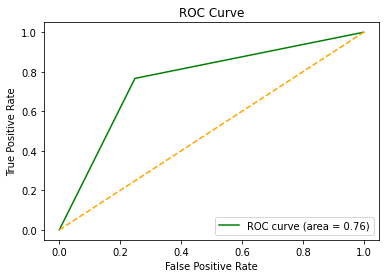

In [53]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=1.0,penalty='l2',solver='saga'),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [54]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [55]:
metrics = []

### Without Scaling

In [56]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000),X,y))

Accuracy:  0.5811071601612865
Precision:  0.5607615321992407
Recall:  0.7510286034034429
F1 Score:  0.641858251317811


### With Standardization

In [57]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=0.1,penalty='l2',solver='newton-cg'),X_standardized,y))

Accuracy:  0.7583094497047738
Precision:  0.7519551273125045
Recall:  0.7713011421612193
F1 Score:  0.7613949395897649


### With Normalization

In [58]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=1.0,penalty='l2',solver='saga'),X_normalized,y))

Accuracy:  0.7534421167601482
Precision:  0.7490862549789382
Recall:  0.7631875185148613
F1 Score:  0.7557588810677445


# Performance and Comparison Plots

In [59]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.581107,0.560762,0.751029,0.641858
With Standardization,0.758309,0.751955,0.771301,0.761395
With Normalization,0.753442,0.749086,0.763188,0.755759


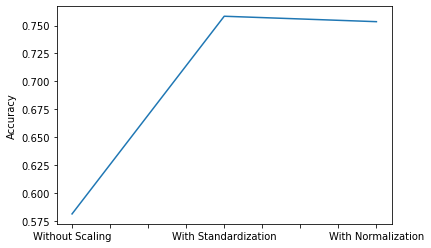

In [60]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

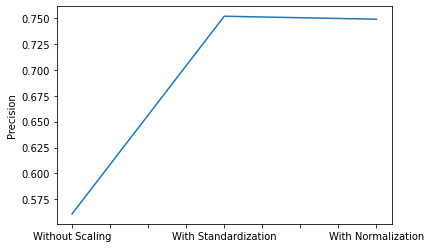

In [61]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

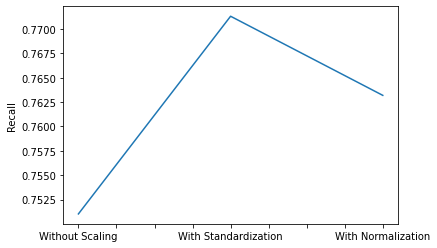

In [62]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

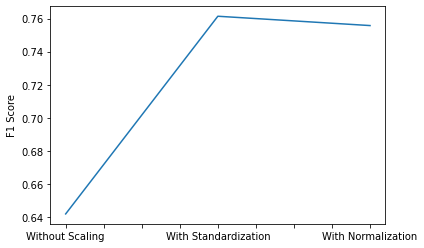

In [63]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()